# Area under 1-D and 2-D curves, various methods

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demqua03.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Oct-23</i>
<hr>

## About

Uni- and bi-vaiariate integration using Newton-Cotes, Gaussian, Monte Carlo, and quasi-Monte Carlo quadrature methods.

## Initial tasks

In [1]:
import numpy as np
from compecon import qnwtrap, qnwsimp, qnwlege
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
quadmethods = [qnwtrap, qnwsimp, qnwlege]

### Make support function

In [3]:
a, b = -1, 1
nlist = [5, 11, 21, 31]
N = len(nlist)

def quad(func, qnw, n):
    xi, wi = qnw(n,a,b)
    return np.dot(func(xi),wi)

## Evaluating
$\int_{-1}^1e^{-x}dx$

In [4]:
def f(x):
    return np.exp(-x)

f_quad = np.array([[quad(f, qnw, ni) for qnw in quadmethods] for ni in nlist])
f_true = np.exp(1) - 1/np.exp(1)
f_error = np.log10(np.abs(f_quad/f_true - 1))


## Evaluating
$\int_{-1}^1\sqrt{|x|}dx$

In [5]:
def g(x):
    return np.sqrt(np.abs(x))

g_quad = np.array([[quad(g, qnw, ni) for qnw in quadmethods] for ni in nlist])
g_true = 4/3
g_error = np.log10(np.abs(g_quad/g_true - 1))

## Make table with results

In [6]:
methods = ['Trapezoid rule', "Simpson's rule", 'Gauss-Legendre']
functions = [r'$\int_{-1}^1e^{-x}dx$', r'$\int_{-1}^1\sqrt{|x|}dx$']

results = pd.concat(
    [pd.DataFrame(errors, columns=methods, index=nlist) for errors in (f_error, g_error)],
    keys=functions)

results

Trapezoid rule  Simpson's rule  Gauss-Legendre
$\int_{-1}^1e^{-x}dx$     5        -1.683044       -3.472173       -9.454795
                          11       -2.477411       -5.053217      -14.273349
                          21       -3.079254       -6.255789      -14.675836
                          31       -3.431396       -6.959867      -15.653560
$\int_{-1}^1\sqrt{|x|}dx$ 5        -1.023788       -1.367611       -0.870112
                          11       -1.595301       -1.347900       -1.351241
                          21       -2.034517       -2.414470       -1.758970
                          31       -2.293296       -2.063539       -2.007803

## Plot the functions

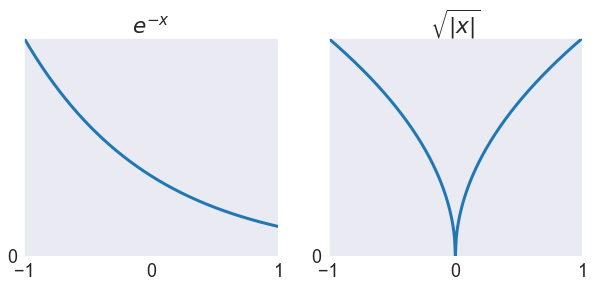

In [7]:
a, b, n = -1, 1, 301
x = np.linspace(a, b, n)

options = dict(xlim=[a,b], xticks=[-1,0,1], yticks=[0])

fig, axs = plt.subplots(1, 2, figsize=[10,4])
axs[0].plot(x, f(x), linewidth=3)
axs[0].set(title='$e^{-x}$', ylim=[0,f(a)], **options)

axs[1].plot(x, g(x), linewidth=3)
axs[1].set(title='$\sqrt{|x|}$', ylim=[0,g(a)], **options);